In [5]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import lxml.etree as ET
import pandas as pd
import matplotlib.pyplot as plt


def makePolygon(coordinates):
    split = coordinates[:-1].split(" ")
    df = pd.DataFrame({"lat": [float(x.split(",")[0]) for x in split], "long": [x.split(",")[1] for x in split]})
    # gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.lat,df.long))

    polygon_geom = Polygon(zip(df['lat'], df['long']))
    polygon = gpd.GeoDataFrame(index=[0], geometry=[polygon_geom])
    return polygon

def makePoint(coordinates):
    lat,long = (float(x) for x in coordinates.split(","))
    polygon_geom = Point(lat,long)
    point = gpd.GeoDataFrame(index=[0], geometry=[polygon_geom])
    return point


In [13]:
file = "data/poly10.txt"
cnt = 10
polygons = []
with open(file,'r') as f:
    for line in f:
        cnt -= 1
        if cnt == 0:
            break
        poly = '<' + line.split(":<")[1]
        poly = poly.replace('srsName','crsName')
        root = ET.fromstring(poly)
        coordinates = root.findall(".//{http://www.opengis.net/gml}coordinates")
        maxi = -1e15
        point = None
        for index,c in enumerate(coordinates):
            p = makePolygon(c.text)
            polygons.append(p['geometry'][0])
            # p.to_file(f"polygons/p_{cnt}_{index}.shp")
            if(line.split(":<")[0] == "POLYGON:9:118523"):
                for i in p.geometry[0].exterior.coords:
                    if(i[0] > maxi):
                        maxi = i[0]
                        point = i
                print(point)
                break

print(polygons)

[<POLYGON ((-13165358.698 3983548.084, -13165367.41 3983543.004, -13165353.64...>, <POLYGON ((-13174631.661 3988114.442, -13174655.748 3988007.037, -13174597.4...>, <POLYGON ((-13163160.513 3978957.931, -13163161.779 3978956.55, -13163160.37...>, <POLYGON ((-13162035.201 3976815.52, -13162093.786 3976741.025, -13162031.48...>, <POLYGON ((-13181891.065 3988713.354, -13181873.589 3988580.072, -13181800.2...>, <POLYGON ((-13186624.719 4006953.974, -13186699.268 4006874.556, -13186554.7...>, <POLYGON ((-13149703.164 3995881.951, -13149833.974 3995779.004, -13149692.3...>, <POLYGON ((-13180226.801 3995733.193, -13180239.526 3995720.682, -13180226.9...>, <POLYGON ((-13189552.297 3995144.22, -13189625.445 3995091.947, -13189530.8 ...>]


In [14]:
point_file="data/points500.txt"
count = 31
points = []
with open(point_file,'r') as f:
    for line in f:
        count -= 1
        if count == 0:
            break
        point = '<' + line.split(":<")[1]
        point = point.replace('srsName','crsName')
        root = ET.fromstring(point)
        coordinates = root.findall(".//{http://www.opengis.net/gml}coordinates")
        for c in coordinates:
            p = makePoint(c.text)
            points.append(p['geometry'][0])
            p.to_file(f"points/point_{count}.shp")
print(points)

[<POINT (-13148438.178 3986007.337)>, <POINT (-13174008.657 4009260.508)>, <POINT (-13172687.596 3982107.396)>, <POINT (-13153240.87 4005783.647)>, <POINT (-13161794.861 3993727.197)>, <POINT (-13157693.632 3995813.539)>, <POINT (-13181920.578 3975637.6)>, <POINT (-13161974.641 4008094.96)>, <POINT (-13154990.513 3993088.308)>, <POINT (-13157379.018 3991554.604)>, <POINT (-13155117.322 3989249.268)>, <POINT (-13152078.721 4010028.541)>, <POINT (-13167512.504 3987519.605)>, <POINT (-13165170.55 3983082.901)>, <POINT (-13160791.625 3995332.34)>, <POINT (-13172406.69 3991809.344)>, <POINT (-13154120.507 4003274.759)>, <POINT (-13175995.867 3985032.872)>, <POINT (-13167340.75 3979801.404)>, <POINT (-13164531.689 4012040.181)>, <POINT (-13158539.561 3991898.57)>, <POINT (-13150640.482 4013260.553)>, <POINT (-13153847.627 4006573.454)>, <POINT (-13166881.669 4002555.078)>, <POINT (-13172045.525 3989258.317)>, <POINT (-13174040.761 3994301.452)>, <POINT (-13165764.465 4002562.844)>, <POINT (-

In [4]:
outside_string = '<gml:Polygon srsName="EPSG:54004" xmlns:gml="http://www.opengis.net/gml"><gml:outerBoundaryIs><gml:LinearRing><gml:coordinates decimal="." cs="," ts=" ">-1.31631605125477E7,3978957.93103972 -1.31631617791721E7,3978956.54995031 -1.31631603704817E7,3978955.2623057 -1.31630341082609E7,3978842.50261086 -1.31629098145308E7,3978728.31718843 -1.31628891487078E7,3978707.23068043 -1.31627830962472E7,3978615.16047169 -1.31627160577091E7,3978455.98657965 -1.31626514386619E7,3978398.14564291 -1.31625274646251E7,3978286.43395187 -1.31624408937708E7,3978211.23419281 -1.31624012391857E7,3978213.50432331 -1.31622832405253E7,3978220.51437957 -1.31621572192914E7,3978071.85565281 -1.31621507703312E7,3977963.94943284 -1.31621443557267E7,3977856.04214539 -1.31621998056364E7,3977697.2619248 -1.31621316860121E7,3977637.36847086 -1.31618802639683E7,3977452.2406402 -1.31618646792396E7,3977190.0873644 -1.31621085311654E7,3977198.88921601 -1.31621302630702E7,3977174.70792081 -1.3162220366085E7,3977072.21425301 -1.31623314093026E7,3976948.74195697 -1.31623751306967E7,3976900.5506837 -1.31623263128864E7,3976856.67640158 -1.31622023397413E7,3976747.29433026 -1.31621786864615E7,3976648.6403307 -1.31620737875915E7,3976555.83227643 -1.31620216303898E7,3976394.94316232 -1.31619395512294E7,3976323.03075155 -1.31618133186176E7,3976210.39700126 -1.31617468223119E7,3976152.1733326 -1.31616876812489E7,3976155.55834024 -1.31615685693938E7,3976158.36180142 -1.31614416651742E7,3975963.52306948 -1.31616231791824E7,3975779.19095023 -1.31615485318853E7,3975781.30313311 -1.31614213038665E7,3975594.78021376 -1.31613185852458E7,3975704.59627648 -1.31610609525154E7,3975531.80722276 -1.316106651849E7,3975429.48761506 -1.31611349250055E7,3975305.22805367 -1.31611387602656E7,3975271.13283074 -1.31610764102634E7,3975203.77946339 -1.31608929498792E7,3975174.44039801 -1.31608739357708E7,3975164.58267182 -1.31608549798689E7,3975154.61296126 -1.31607827382721E7,3975124.68264326 -1.31606883856684E7,3975092.28361608 -1.31605782253768E7,3975084.65211645 -1.3160448948318E7,3975152.41427061 -1.31603987061037E7,3975154.79658431 -1.3160351847359E7,3975143.55876215 -1.31603055517458E7,3975131.46094622 -1.31602660696795E7,3975112.25847264 -1.3160262465597E7,3975113.38438475 -1.3160164519139E7,3975132.0717781 -1.31600103283009E7,3975146.00131797 -1.31598976423336E7,3975235.99278315 -1.31598085080511E7,3975233.18259774 -1.31597088735376E7,3975231.90783023 -1.31597028547277E7,3975233.26107677 -1.31596683456856E7,3975238.8674974 -1.31596249310842E7,3975240.26910303 -1.31594657442125E7,3975220.64664159 -1.31594618890048E7,3975218.16799315 -1.31594252783152E7,3975272.10826179 -1.31593759068953E7,3975330.00122905 -1.31592935798228E7,3975420.67203958 -1.31592203321575E7,3975523.32869523 -1.31592142522419E7,3975533.74967847 -1.31591508720038E7,3975617.58383645 -1.31590505225118E7,3975677.57938008 -1.31589118401634E7,3975652.16855445 -1.31588112406878E7,3975548.08538685 -1.31587616737952E7,3975499.79811777 -1.31585099244332E7,3975465.88542238 -1.31584258070858E7,3975551.43027785 -1.31582145131362E7,3975657.95608485 -1.3158192249238E7,3975656.55442234 -1.31581822304838E7,3975656.55442234 -1.31579410608749E7,3975551.760073 -1.31578354840199E7,3975448.68217912 -1.31577469712749E7,3975359.56340138 -1.315765845864E7,3975448.67794599 -1.3157525657314E7,3975554.58324581 -1.31575009552003E7,3975638.33282695 -1.31573061460914E7,3975725.2361099 -1.31572460335664E7,3975711.21940172 -1.31572139679284E7,3975703.33000288 -1.31573194830034E7,3975832.30289032 -1.31573236441323E7,3975890.05465521 -1.31573186733477E7,3975930.50172657 -1.3157152525194E7,3976114.90823978 -1.31571071281213E7,3976117.83303606 -1.315692883894E7,3976219.48860503 -1.31567640201711E7,3976175.18258464 -1.3156705020841E7,3976099.48927793 -1.3156692775697E7,3976091.07894488 -1.3156673443127E7,3976090.43833071 -1.31565721744347E7,3976167.35260927 -1.31565608748256E7,3976286.19403207 -1.31565234250004E7,3976381.99274699 -1.3156510546428E7,3976406.5137601 -1.31564780160833E7,3976577.19548384 -1.31563989212191E7,3976772.20662135 -1.31563857927063E7,3976787.3889064 -1.31562846126591E7,3976908.86804334 -1.31562754761665E7,3976939.99827194 -1.31561983605878E7,3977029.46225643 -1.31560957026766E7,3977150.93586047 -1.31560487930046E7,3977211.12174874 -1.31559974273068E7,3977271.31077693 -1.31559927349229E7,3977382.43879864 -1.31559800689028E7,3977396.87428389 -1.31556009345601E7,3977037.6646379 -1.31554659004644E7,3976955.92936089 -1.315545314751E7,3976959.97069584 -1.31549943691142E7,3977328.16134019 -1.31545893659618E7,3977659.06434125 -1.31545678137639E7,3977682.42215014 -1.31538307370766E7,3978563.65314732 -1.31535474385966E7,3978903.11822003 -1.31538348371789E7,3979599.9784312 -1.31541830662339E7,3979935.52471196 -1.31545067788902E7,3980221.99351204 -1.31546909921182E7,3980381.51968107 -1.31546640110713E7,3980533.07785287 -1.31546869311492E7,3980555.1695839 -1.3154777806952E7,3980660.83327911 -1.31547979457811E7,3980686.89102058 -1.31549862479023E7,3980900.10778434 -1.31549643855062E7,3980945.41848471 -1.31550460576292E7,3981018.83239834 -1.31551082446742E7,3981196.95055974 -1.31551846888161E7,3981338.8514099 -1.31551273009107E7,3981491.78048278 -1.31551272564246E7,3981536.91156738 -1.31552300581634E7,3981571.14868079 -1.31553796362704E7,3981599.98179459 -1.31554286996636E7,3981634.58891262 -1.31556280528805E7,3981627.30300732 -1.31557014642303E7,3981680.61747083 -1.31558194113626E7,3981711.84572121 -1.31559843778475E7,3981772.77098782 -1.31560164273776E7,3981796.44465933 -1.31561785930679E7,3981873.88121814 -1.3156330672771E7,3981982.97392778 -1.31564136337098E7,3982041.54972213 -1.31565023277958E7,3982088.41431127 -1.31566433439159E7,3982190.54574169 -1.31568055226451E7,3982308.1314779 -1.31568558636852E7,3982344.05565352 -1.31569590500965E7,3982418.79616688 -1.31570688569142E7,3982497.55661396 -1.31571084220241E7,3982527.11421767 -1.31572491975055E7,3982643.94451984 -1.31572824991133E7,3982668.28882156 -1.31574200660244E7,3982746.63820456 -1.31574945229997E7,3982799.97676605 -1.31576809064982E7,3982765.17134396 -1.3157763325176E7,3982826.07830324 -1.31578604991787E7,3982943.7139104 -1.31579018345788E7,3982973.46634325 -1.31581148586405E7,3983126.95542169 -1.31581663748184E7,3983165.74396973 -1.31582935808227E7,3983258.38513819 -1.31583850659626E7,3983133.55983643 -1.31586445650421E7,3983057.95655707 -1.31587590225662E7,3982969.2743996 -1.31587658447219E7,3982934.71631204 -1.31588568990789E7,3982811.86006625 -1.31589411343483E7,3982704.98463064 -1.3159152666733E7,3982746.654417 -1.31592800011591E7,3982828.44984591 -1.31594032678493E7,3982869.20452636 -1.31595198633767E7,3982739.13913548 -1.31595824136314E7,3982669.21799424 -1.3159640074403E7,3982606.77830319 -1.31596663076309E7,3982577.32807537 -1.31597586207976E7,3982473.4541199 -1.31598692436094E7,3982350.00336727 -1.31599127377211E7,3982301.82509055 -1.31599776366027E7,3982146.01712901 -1.31600897406764E7,3982020.38943896 -1.3160098721035E7,3982010.4029895 -1.31602029657241E7,3981888.14491556 -1.31604419401021E7,3981907.73545469 -1.31605553788998E7,3981783.9047578 -1.31606143803768E7,3981717.54227406 -1.3160668014585E7,3981658.25098572 -1.31607806625014E7,3981531.55093502 -1.31608609080778E7,3981444.04929167 -1.31608930501241E7,3981408.39131561 -1.31610059651117E7,3981281.21543451 -1.3161061737457E7,3981218.63845174 -1.31611095798629E7,3981164.40606301 -1.31610643219713E7,3981113.89097095 -1.31611661357674E7,3980846.61567188 -1.31611411025492E7,3980837.00101129 -1.31610988011427E7,3980552.32416114 -1.31611132726765E7,3980528.48458549 -1.31611266310154E7,3980501.84041927 -1.316113219699E7,3980479.40328021 -1.31613080817855E7,3980353.1952851 -1.31613214401244E7,3980354.59758766 -1.3161387118624E7,3980350.39068059 -1.31614194012763E7,3980355.9998904 -1.31615184756231E7,3980365.81601494 -1.31615529846653E7,3980368.62062368 -1.3161691020834E7,3980545.3125156 -1.31616921340289E7,3980570.55446226 -1.31616929548555E7,3980572.88101916 -1.31618179250535E7,3980677.13225351 -1.31618312833924E7,3980709.38627646 -1.31618446417313E7,3980737.43333517 -1.316186022646E7,3980772.49226615 -1.31618722680195E7,3980800.30303211 -1.31618905272473E7,3980665.9004638 -1.31620528091793E7,3980497.6334521 -1.31621837918104E7,3980502.02181508 -1.3162315290801E7,3980258.74723551 -1.31623711829232E7,3980089.56580321 -1.31624296996272E7,3980047.53902384 -1.31624983961204E7,3979968.60765615 -1.31626117072065E7,3979841.41976323 -1.31626748642594E7,3979770.14978914 -1.31627250861301E7,3979709.91737046 -1.31628360257715E7,3979585.40881098 -1.3162916010529E7,3979494.62149151 -1.31629477921363E7,3979454.32608399 -1.31630619820549E7,3979326.49146541 -1.31631597316032E7,3979216.88422625 -1.31631605125477E7,3978957.93103972 </gml:coordinates></gml:LinearRing></gml:outerBoundaryIs></gml:Polygon>'
inside_string = '<gml:Polygon srsName="EPSG:54004" xmlns:gml="http://www.opengis.net/gml"><gml:outerBoundaryIs><gml:LinearRing><gml:coordinates decimal="." cs="," ts=" ">-1.31746316608093E7,3988114.44232758 -1.31746557480656E7,3988007.03652156 -1.31745974073346E7,3987732.00600857 -1.31739968928967E7,3986552.66120289 -1.31734074599513E7,3985985.6089281 -1.3172742186027E7,3986002.47986404 -1.31727324744481E7,3986002.72872332 -1.3172732830078E7,3985997.35200702 -1.31728972352085E7,3985723.3718225 -1.31728686135112E7,3985570.23609873 -1.31725754671846E7,3985543.75725518 -1.31725565428711E7,3985529.72499937 -1.31725387317526E7,3985521.30565508 -1.31723873372453E7,3985479.20903711 -1.31722314899581E7,3985279.95405281 -1.31721880753567E7,3985216.81067402 -1.3172244848297E7,3984808.4928602 -1.31722504142716E7,3984804.28348272 -1.31722615462207E7,3984793.05848449 -1.31722715649748E7,3984780.43037617 -1.31722849233137E7,3984755.1742061 -1.3172404035169E7,3984642.9253124 -1.31724185067028E7,3984631.70049047 -1.31724352046264E7,3984619.07258047 -1.31725031095158E7,3984558.73944689 -1.31725142414649E7,3984551.72398923 -1.31725832595492E7,3984508.22825867 -1.31726233345658E7,3984482.9727577 -1.31726567304131E7,3984461.92655428 -1.31726789943112E7,3984445.0896226 -1.31727068241839E7,3984422.64042328 -1.31729993166074E7,3984377.8112371 -1.31730855323885E7,3984335.1912468 -1.31732459291419E7,3983978.11700758 -1.31733046098497E7,3983911.93438842 -1.31733745188969E7,3983853.19512644 -1.3173347659319E7,3983710.36402439 -1.31736329807671E7,3983360.5959274 -1.31736868043651E7,3983343.8756232 -1.31736771142893E7,3983307.77621298 -1.31737012773872E7,3983043.2776962 -1.31736402378156E7,3982710.5256197 -1.31736162573572E7,3982617.87123113 -1.31735767045093E7,3982460.50506117 -1.31735736289754E7,3982107.35582168 -1.31735817817373E7,3981717.07490912 -1.3173589407035E7,3981618.96144391 -1.3173599842698E7,3981554.92076154 -1.31736215036615E7,3981391.33161125 -1.31735805054233E7,3981183.74276085 -1.31736272854432E7,3981008.40295608 -1.31735944725172E7,3980881.49538028 -1.31735936904516E7,3980866.18224779 -1.31735929273311E7,3980859.4517079 -1.31736056618021E7,3980716.99390779 -1.3173526232481E7,3980473.51765186 -1.31735337274165E7,3980312.63118457 -1.31735108391311E7,3980165.32377065 -1.31734890177539E7,3980022.93686904 -1.31734937105722E7,3979950.65532045 -1.31734221849499E7,3979784.67551342 -1.31733787456824E7,3979788.94806785 -1.31730797444782E7,3979797.7481078 -1.31729773509541E7,3979731.76059568 -1.31727477460158E7,3979602.08959884 -1.31723974882838E7,3979395.25505858 -1.31723567760113E7,3979275.13541312 -1.31723031796416E7,3979182.99899007 -1.31722460581381E7,3979037.97923058 -1.31722401190531E7,3978970.39983095 -1.31721197051625E7,3978962.2862272 -1.31719224871158E7,3978907.49396442 -1.31717327786394E7,3978922.66137825 -1.31715626697413E7,3978884.35211903 -1.31715264060737E7,3978882.37767658 -1.31713628424347E7,3978873.93167446 -1.31711485440777E7,3978857.86586263 -1.31711246963061E7,3978861.91127247 -1.31709481568817E7,3978849.12169368 -1.31709130408719E7,3978846.05841801 -1.317079395822E7,3978847.15117246 -1.31706586189013E7,3978832.30373811 -1.3170449398389E7,3978742.53513807 -1.31703099557299E7,3978727.56927035 -1.31702717978836E7,3978723.74354177 -1.31700877740174E7,3978785.04897591 -1.31699430678414E7,3978772.52156578 -1.31697982469346E7,3978756.31247319 -1.31697086391117E7,3978743.81342134 -1.316945697637E7,3978645.45508934 -1.31693095499919E7,3978627.12498335 -1.31691674088515E7,3978612.12188437 -1.31690331163737E7,3978598.22444589 -1.31688647805245E7,3978579.97322404 -1.31686432592555E7,3978613.11984183 -1.31685035806133E7,3978586.09143952 -1.31684958534047E7,3978584.49676699 -1.3168251593782E7,3978538.86050477 -1.31680425375198E7,3978597.32760835 -1.31680358583504E7,3978597.32760835 -1.31679337867647E7,3978590.18847656 -1.31678072826669E7,3978700.34966341 -1.31676914718042E7,3978834.12205373 -1.31674022184658E7,3979045.30346727 -1.31672325228574E7,3979161.1273748 -1.31671051742684E7,3979164.95427843 -1.31670962102983E7,3979179.14914719 -1.31670823744102E7,3979197.99504714 -1.31670498834157E7,3979445.20465221 -1.31670268955863E7,3979492.25105253 -1.31670696051696E7,3979657.50483851 -1.31674881664552E7,3979879.0900801 -1.31675315810566E7,3979916.95639025 -1.31675705428784E7,3979950.61544968 -1.31676072783104E7,3979984.27461928 -1.31676206366493E7,3979995.49436697 -1.31677375221146E7,3980267.57699672 -1.31677341825299E7,3980297.02967201 -1.31677308429452E7,3980348.92268617 -1.31677375221146E7,3980379.77811604 -1.3167745314479E7,3980412.03616445 -1.31677597860128E7,3980437.28166426 -1.3167418868937E7,3980861.90480553 -1.31675171095227E7,3980985.68532024 -1.31675482789801E7,3981022.15309683 -1.31679045013509E7,3980580.34066741 -1.31679200860796E7,3980590.15851515 -1.31681583097899E7,3981038.98442203 -1.31677275033603E7,3981173.63601511 -1.31677731443515E7,3981203.0912862 -1.31678733318934E7,3981336.34237662 -1.31679835381892E7,3981456.9711691 -1.31680002361129E7,3981483.62190717 -1.31678788978679E7,3981893.21036231 -1.31678365964613E7,3981924.07042762 -1.31678132193682E7,3981963.34700836 -1.31678032006141E7,3981997.01276845 -1.31678020874191E7,3982030.67863881 -1.31673545830659E7,3982298.60678777 -1.31673367719474E7,3982285.98174438 -1.31672524800379E7,3982183.84878487 -1.31672213411556E7,3982182.2949207 -1.31671628280843E7,3982274.97874137 -1.31674030887951E7,3982411.84053257 -1.31674414122689E7,3982504.81802508 -1.31674603365823E7,3982546.90245939 -1.31674803740906E7,3982573.55602359 -1.31674926192346E7,3982586.18142023 -1.31675148831328E7,3982607.22378241 -1.31675282414717E7,3982617.04356618 -1.31675471657851E7,3982628.26618768 -1.31675672032935E7,3982638.08599156 -1.31675894671916E7,3982647.90580483 -1.31676161838695E7,3982660.5312928 -1.31676451269371E7,3982673.15679627 -1.31676985602927E7,3982695.60217408 -1.31677486540636E7,3982719.45044171 -1.31677842763006E7,3982734.8817032 -1.31678232381224E7,3982753.11867845 -1.31678822374526E7,3982795.20412949 -1.31679445763675E7,3982863.94407013 -1.31679935569434E7,3982925.6701229 -1.31680525562735E7,3982991.6051797 -1.31681271403325E7,3983244.12633087 -1.31681238007478E7,3983270.78170329 -1.31681215743579E7,3983324.09265563 -1.3168120461163E7,3983387.22440418 -1.31681260271376E7,3983409.67134156 -1.31681338195019E7,3983423.70070234 -1.31681527438154E7,3983446.1477194 -1.31678515775293E7,3983928.26323383 -1.31681772341033E7,3983464.38595688 -1.31682128563404E7,3983485.43011726 -1.31682406862131E7,3983506.47432073 -1.31683108174924E7,3983589.24860584 -1.31678922562069E7,3983962.44264547 -1.31679289916389E7,3983993.30892474 -1.31679623874861E7,3984017.16020407 -1.3167987990969E7,3984029.78737435 -1.31680803861464E7,3984102.74466206 -1.31681238007479E7,3984129.40226178 -1.3168182800078E7,3984177.10550758 -1.31682039507812E7,3984192.53895802 -1.31682451389928E7,3984207.97243168 -1.31682907799841E7,3984224.80897481 -1.31683319681957E7,3984243.04859435 -1.31683653640429E7,3984255.67604222 -1.31684043258647E7,3984265.49740131 -1.31684288161526E7,3984269.70655805 -1.3168449966856E7,3984272.51266353 -1.3168474457144E7,3984272.51266353 -1.31685056266014E7,3984265.49740127 -1.31686024745584E7,3984212.1815648 -1.31686570211089E7,3984196.74808484 -1.31686692662529E7,3984193.94200005 -1.31686870773714E7,3984182.71766862 -1.31687783593538E7,3984126.59619528 -1.31688106420062E7,3984112.56587484 -1.31688418114636E7,3984088.71437406 -1.31688707545312E7,3984062.05687989 -1.31688907920395E7,3984036.80247553 -1.31688985844039E7,3984018.56322209 -1.31689074899632E7,3983996.11495459 -1.3168909716353E7,3983975.06974836 -1.31689074899632E7,3983947.00954044 -1.31693060137402E7,3983610.29302182 -1.31694885777051E7,3983824.94852754 -1.31694908040949E7,3983830.56049632 -1.31694952568746E7,3983834.76947492 -1.31695119547982E7,3983847.3964211 -1.31696655756955E7,3984157.46296759 -1.31696655756955E7,3984178.50854736 -1.31695630575404E7,3984395.9382749 -1.31695798596876E7,3984402.99741396 -1.31696243874839E7,3984426.84964429 -1.31696644625006E7,3984445.08962248 -1.31697301410001E7,3984474.55427102 -1.31697390465594E7,3984480.16659461 -1.31697490653136E7,3984481.56967598 -1.31699761570748E7,3984571.36728262 -1.31700151188966E7,3984605.04158743 -1.31700540807183E7,3984634.50669467 -1.31700930425401E7,3984658.35946244 -1.31701264383874E7,3984675.19674361 -1.31702321919036E7,3984774.81788845 -1.31702689273356E7,3984809.89598629 -1.31703167947166E7,3984840.76481147 -1.31703646620977E7,3984861.81179089 -1.3170493792707E7,3984919.34042129 -1.31705227357746E7,3984936.17813017 -1.31705512111654E7,3984950.78544837 -1.31710951803189E7,3985093.40278277 -1.31711461249229E7,3985105.95990321 -1.31712240485665E7,3985138.23278898 -1.31713108777693E7,3985152.26451008 -1.31713687639045E7,3985155.07085661 -1.31713921409976E7,3985150.86133711 -1.3171786211995E7,3985254.69665466 -1.31718307397913E7,3985302.40512539 -1.31718363057658E7,3985303.80831906 -1.3172061577445E7,3985628.2072782 -1.31722236975937E7,3985872.11751303 -1.31722242494518E7,3985875.13204615 -1.31722307141033E7,3985910.44536606 -1.31722114524497E7,3986062.96419522 -1.31722082249806E7,3986075.16987943 -1.31724839709346E7,3986118.1752626 -1.31720021526241E7,3987918.98759284 -1.31720124667729E7,3988363.85246708 -1.31720908692949E7,3988463.38938075 -1.31722421564455E7,3988612.80114012 -1.31732104521417E7,3988941.3179129 -1.31742780788755E7,3988906.80356015 -1.31743510172907E7,3988765.58230553 -1.31746316608093E7,3988114.44232758 </gml:coordinates></gml:LinearRing></gml:outerBoundaryIs></gml:Polygon>'
point_string = '<gml:Point srsName="EPSG:54004" xmlns:gml="http://www.opengis.net/gml"><gml:coordinates decimal="." cs="," ts=" ">-1.31726875962544E7,3982107.39594684 </gml:coordinates></gml:Point>'

root = ET.fromstring(outside_string)
coordinates = root.find(".//{http://www.opengis.net/gml}coordinates").text
outside_poly = makePolygon(coordinates)

root = ET.fromstring(inside_string)
coordinates = root.find(".//{http://www.opengis.net/gml}coordinates").text
inside_poly = makePolygon(coordinates)

root = ET.fromstring(point_string)
coordinates = root.find(".//{http://www.opengis.net/gml}coordinates").text
point = makePoint(coordinates)


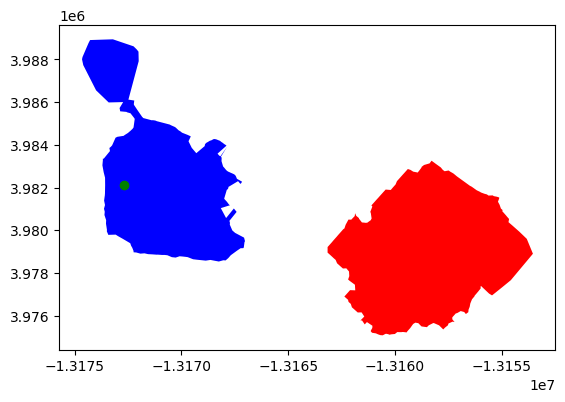

In [5]:
import matplotlib.pyplot as plt

ax = outside_poly.plot(color='red')
inside_poly.plot(ax=ax, color='blue')
point.plot(ax=ax,color='green')

plt.show()

In [6]:
print(outside_poly.contains(point))
print(inside_poly.contains(point))

0    False
dtype: bool
0    True
dtype: bool


In [7]:
p1 = [-13146587.9594042562,4006770.1723186821]
p2 = [-13144304.9497918542, 4008803.9450738342]
p3 = [-13142655.0017968640, 4006281.6680784738]
p4 = [-13140484.7883724, 4005787.71055533]
p5 = [-13134484.7883724, 4005787.71055533]
from shapely.geometry import LineString

a = LineString([p5,p4])
gdf = gpd.GeoDataFrame({'geometry': [a]})
gdf.to_file("lines/5.shp")

-13148438.178342 3986007.33707501
-13174008.6574142 4009260.50838627
-13172687.5962544 3982107.39594684
-13153240.8697033 4005783.646948
-13161794.8611016 3993727.19691904
-13157693.632349 3995813.53906687
-13181920.5777751 3975637.59993071
-13161974.6409922 4008094.96017429
-13154990.5132806 3993088.30761502
-13157379.0175406 3991554.60372936
-13155117.3223106 3989249.26757539
-13152078.7211252 4010028.54120767
-13167512.5036914 3987519.60504839
-13165170.5495818 3983082.90105785
-13160791.6251053 3995332.33972004
-13172406.6901755 3991809.34448241
-13154120.5070248 4003274.75880012
-13175995.8672756 3985032.87170314
-13167340.7496889 3979801.40414987
-13164531.6888994 4012040.18116396
-13158539.560941 3991898.56976161
-13150640.482001 4013260.55297853
-13153847.6268338 4006573.45405983
-13166881.668897 4002555.07784158
-13172045.5252168 3989258.31732912
-13174040.7609662 3994301.45220997
-13165764.4652916 4002562.84393723
-13151192.6630933 3980718.57702579
-13175363.4273036 3990836.9

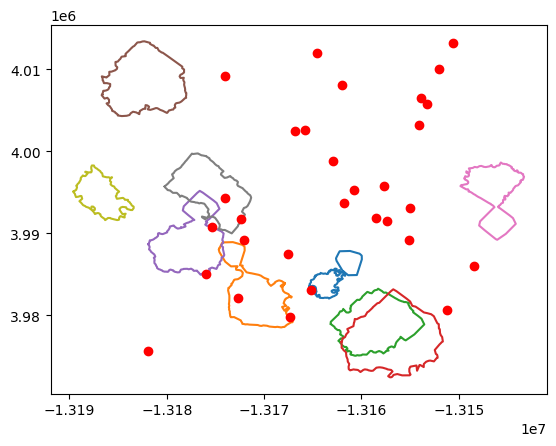

In [21]:
import rtree
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt


for poly in polygons:
    plt.plot(*poly.exterior.xy)

# Plot the points
for point in points:
    print(point.x, point.y)
    plt.plot(point.x, point.y, 'ro')

# Set the axis limits and show the plot
# plt.xlim([-0.5, 15])
# plt.ylim([-0.5, 15])
# plt.show()

# Create an R-tree index using the MBRs of the polygons
idx = rtree.index.Index()
for i, polygon in enumerate(polygons):
    idx.insert(i, polygon.bounds)

# Define a function for ray casting algorithm
def ray_casting(point, poly):
    n = len(poly)
    inside = False
    p1x, p1y = poly[0]
    for i in range(n+1):
        p2x, p2y = poly[i % n]
        if point.y > min(p1y, p2y):
            if point.y <= max(p1y, p2y):
                if point.x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (point.y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or point.x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y
    return inside

# Perform a range query for each point
for point in points:
    bbox = point.bounds
    intersected_polygons = [polygons[i] for i in idx.intersection(bbox)]
    for polygon in intersected_polygons:
        if ray_casting(point, list(polygon.exterior.coords)):
            print(f"Point {point.coords[0]} is inside Polygon {polygons.index(polygon)}")

# Print a message for any points that are not inside any polygons
for point in points:
    bbox = point.bounds
    intersected_polygons = [polygons[i] for i in idx.intersection(bbox)]
    if not intersected_polygons:
        print(f"Point {point.coords[0]} is not inside any polygons")
